# Realisation du modele a partir de mon dataset

Import

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('csv/cleaned_data.csv')

In [23]:
data.head(1)

,customer_id,customer_unique_id,geolocation_lat,geolocation_lng,order_id,order_status,delivery_time,freight_value,order_price,payment_type,payment_value,payment_installments,payment_sequential,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-20.50207,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,8.0,21.88,124.99,credit_card,146.87,2,1,4.0


## Analyse

Je vais realiser ici une analyse de mon data set clean.

In [24]:
data.describe()

,geolocation_lat,geolocation_lng,delivery_time,freight_value,order_price,payment_value,payment_installments,payment_sequential,review_score
count,97642.000000,97642.000000,95565.000000,97642.000000,97642.000000,97642.000000,97642.000000,97642.000000,97642.000000
mean,-21.196422,-46.182419,12.043185,22.799091,251.211153,160.361894,2.929498,1.045360,4.104992
std,5.599672,4.052806,9.460702,21.630109,2539.216397,219.337345,2.712866,0.381463,1.330310
min,-33.690972,-72.670987,0.000000,0.000000,0.850000,9.590000,0.000000,1.000000,1.000000
25%,-23.589547,-48.108180,6.000000,13.830000,48.000000,61.895000,1.000000,1.000000,4.000000
50%,-22.925419,-46.631469,10.000000,17.160000,89.990000,105.280000,2.000000,1.000000,5.000000
75%,-20.140685,-43.606953,15.000000,24.000000,174.900000,176.735000,4.000000,1.000000,5.000000
max,3.844931,-34.799347,208.000000,1794.960000,483840.000000,13664.080000,24.000000,29.000000,5.000000


In [25]:
data.shape

(97642, 14)

### Statut de la commande

In [26]:
data.order_status.describe()

count         97642
unique            7
top       delivered
freq          95567
Name: order_status, dtype: object

In [27]:
data.groupby('order_status')['customer_id'].count()

order_status
approved           2
canceled         443
delivered      95567
invoiced         306
processing       294
shipped         1024
unavailable        6
Name: customer_id, dtype: int64

In [28]:
mean_delivered = 95567 / 97642
mean_delivered

0.9787488990393478

97.87% des colis sont livres.

In [29]:
mean_shipped = 1024 / 97642
mean_shipped

0.010487290305401364

1.04% des colis sont en cours de livraison. 

In [30]:
mean_canceled = 443 / 97642
mean_canceled 

0.0045369820364187545

0.4% des colis sont canceled.

### Temps de livraison

In [31]:
data.delivery_time.describe()

count    95565.000000
mean        12.043185
std          9.460702
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        208.000000
Name: delivery_time, dtype: float64

Temps de livraison moyen de 12 jours.

Temps de livraison max de 208 jours.

### Moyenne des paiements

In [32]:
data.freight_value.describe()

count    97642.000000
mean        22.799091
std         21.630109
min          0.000000
25%         13.830000
50%         17.160000
75%         24.000000
max       1794.960000
Name: freight_value, dtype: float64

La moyenne des frais des ports est de 22.76 dollars.

In [33]:
data.order_price.describe()

count     97642.000000
mean        251.211153
std        2539.216397
min           0.850000
25%          48.000000
50%          89.990000
75%         174.900000
max      483840.000000
Name: order_price, dtype: float64

La moyenne des achats est de 250 dollars. La plus grosse commande represente un total de 483840 dollars.

## Modele

In [34]:
from kneed import KneeLocator
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [35]:
data.columns

Index(['customer_id', 'customer_unique_id', 'geolocation_lat',
       'geolocation_lng', 'order_id', 'order_status', 'delivery_time',
       'freight_value', 'order_price', 'payment_type', 'payment_value',
       'payment_installments', 'payment_sequential', 'review_score'],
      dtype='object')

Drop les NaN de mon dataset.

In [36]:
data.isna().sum()
data.dropna(inplace=True)

In [41]:
X = data.drop(['customer_id', 'customer_unique_id', 'order_id'], axis=1)

ohe_features = ['order_status', 'payment_type']
ohe_pipeline = make_pipeline(OneHotEncoder())

scaled_features = ['geolocation_lat', 'geolocation_lng', 'delivery_time', 'freight_value', 'order_price', 'payment_value', 'payment_installments', 'payment_sequential', 'review_score']
scaled_pipeline = make_pipeline(StandardScaler())

preprocessing = make_column_transformer((ohe_pipeline, ohe_features), (scaled_pipeline, scaled_features))
model = make_pipeline(preprocessing, KMeans(n_clusters=5))

model.fit(X)
model.predict(X)

array([0, 4, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
X.iloc[:,0]

0       -20.502070
1       -20.502070
2       -20.502070
3       -20.502070
4       -20.502070
           ...    
97637   -23.501806
97638   -28.526971
97639   -23.588504
97640   -16.822945
97641   -28.226596
Name: geolocation_lat, Length: 95565, dtype: float64

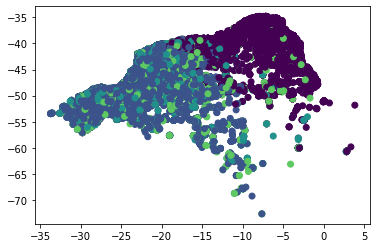

In [39]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=model.predict(X))
plt.show()